Data Science Solutions by Tshepo Chris Nokeri, Apress. 2021

# CHAPTER 3: LINEAR MODELLING WITH SCIKIT-LEARN, PYSPARK AND H2O

This introductory chapter debunks the ordinary least-square method and executes it with
chief Python frameworks (i.e., SciKit-Learn, Spark MLlib, and H2O). Initially, it
explains the underlying concept behind the method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1, font="Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
df = pd.read_csv(r"C:\Users\i5 lenov\Desktop\Source Code-20210822T014112Z-001\Source Code\Chapter_3_Parametric_Methods_Linear_Regression_Analysis\WA_Fn-UseC_-Marketing_Customer_Value_Analysis.csv")

C:\Users\i5 lenov\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\i5 lenov\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\i5 lenov\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


## Dropping Unnecessary Features in the Data

In [2]:
drop_column_names = df.columns[[0, 6]]
initial_data = df.drop(drop_column_names, axis="columns")

## Attain Dummy Features

In [3]:
initial_data.iloc[::, 0] = pd.get_dummies(initial_data.iloc[::, 0])
initial_data.iloc[::, 2] = pd.get_dummies(initial_data.iloc[::, 2])
initial_data.iloc[::, 3] = pd.get_dummies(initial_data.iloc[::, 3])
initial_data.iloc[::, 4] = pd.get_dummies(initial_data.iloc[::, 4])
initial_data.iloc[::, 5] = pd.get_dummies(initial_data.iloc[::, 5])
initial_data.iloc[::, 6] = pd.get_dummies(initial_data.iloc[::, 6])
initial_data.iloc[::, 7] = pd.get_dummies(initial_data.iloc[::, 7])
initial_data.iloc[::, 8] = pd.get_dummies(initial_data.iloc[::, 8])
initial_data.iloc[::, 9] = pd.get_dummies(initial_data.iloc[::, 9])
initial_data.iloc[::, 15] = pd.get_dummies(initial_data.iloc[::, 15])
initial_data.iloc[::, 16] = pd.get_dummies(initial_data.iloc[::, 16])
initial_data.iloc[::, 17] = pd.get_dummies(initial_data.iloc[::, 17])
initial_data.iloc[::, 18] = pd.get_dummies(initial_data.iloc[::, 18])
initial_data.iloc[::, 20] = pd.get_dummies(initial_data.iloc[::, 20])
initial_data.iloc[::, 21] = pd.get_dummies(initial_data.iloc[::, 21])

## Outline Features

In [4]:
import numpy as np
int_x = initial_data.iloc[::,0:19]
fin_x = initial_data.iloc[::,19:21]
x_combined = pd.concat([int_x, fin_x], axis=1)
x = np.array(x_combined)
y = np.array(initial_data.iloc[::,19])

## Randomly Divide the Data Frame

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Scale Features

In [7]:
from sklearn.preprocessing import StandardScaler
sk_standard_scaler = StandardScaler()
sk_standard_scaled_x_train = sk_standard_scaler.fit_transform(x_train)
sk_standard_scaled_x_test = sk_standard_scaler.transform(x_test)

## Execute the Linear Regression Method with the SciKit-Learn Framework

In [8]:
from sklearn.linear_model import LinearRegression
sk_linear_model = LinearRegression()
sk_linear_model.fit(sk_standard_scaled_x_train, y_train)

LinearRegression()

In [9]:
from sklearn.model_selection import GridSearchCV
sk_linear_model_param = {'fit_intercept':[True,False]}
sk_linear_model_param_mod  = GridSearchCV(estimator=sk_linear_model, param_grid=sk_linear_model_param, n_jobs=-1)
sk_linear_model_param_mod.fit(sk_standard_scaled_x_train, y_train)
print("Best OLS score: ", sk_linear_model_param_mod.best_score_)
print("Best OLS parameter: ", sk_linear_model_param_mod.best_params_)

Best OLS score:  1.0
Best OLS parameter:  {'fit_intercept': True}


In [10]:
sk_linear_model = LinearRegression(fit_intercept= True)
sk_linear_model.fit(sk_standard_scaled_x_train,y_train)

LinearRegression()

In [11]:
print(sk_linear_model.intercept_)

433.0646521131769


In [12]:
print(sk_linear_model.coef_)

[-6.15076155e-15  2.49798076e-13 -1.95573220e-14 -1.90089677e-14
 -5.87187344e-14  2.50923806e-14 -1.05879478e-13  1.53591400e-14
 -1.82507711e-13 -7.86327034e-14  4.17629484e-13  1.28923537e-14
  6.52911311e-14 -5.28069778e-14 -1.57900159e-14 -6.74040176e-14
 -9.28427833e-14  5.03132848e-14 -8.75978166e-15  2.90235705e+02
 -9.55950515e-14]


In [13]:
sk_yhat = sk_linear_model.predict(sk_standard_scaled_x_test)
sk_yhat = pd.DataFrame(sk_yhat, columns = ["Computed Values"])
sk_yhat.head(10)

,Computed Values
0,336.000000
1,489.600000
2,571.200000
3,2893.239678
4,907.200000
5,765.566699
6,419.750892
7,386.520235
8,446.400000
9,633.600000


## Model Evaluation

In [14]:
from sklearn import metrics
sk_mean_ab_error = metrics.mean_absolute_error(y_test, sk_yhat)
sk_mean_sq_error = metrics.mean_squared_error(y_test, sk_yhat)
sk_root_sq_error = np.sqrt(sk_mean_sq_error)
sk_determinant_coef = metrics.r2_score(y_test, sk_yhat)
sk_exp_variance = metrics.explained_variance_score(y_test, sk_yhat)
sk_linear_model_ev = [[sk_mean_ab_error, sk_mean_sq_error, sk_root_sq_error,
                       sk_determinant_coef, sk_exp_variance]]
sk_linear_model_assessment = pd.DataFrame(sk_linear_model_ev, index = ["Estimates"], columns = ["Sk mean absolute error",
                                                                                                "Sk mean squared error",
                                                                                                "Sk root mean squared error",
                                                                                                "Sk determinant coefficient",
                                                                                                "Sk variance score"])
sk_linear_model_assessment

,Sk mean absolute error,Sk mean squared error,Sk root mean squared error,Sk determinant coefficient,Sk variance score
Estimates,9.091189e-13,1.512570e-24,1.229866e-12,1.0,1.0


# Spark MLlib

In [15]:
import findspark as initiate_pyspark
initiate_pyspark.init("C:\Spark\spark-3.0.0-bin-hadoop2.7")

In [16]:
from pyspark import SparkConf
pyspark_configuration = SparkConf().setAppName("pyspark_linear_method").setMaster("local")

In [17]:
from pyspark import SparkContext
pyspark_context = SparkContext(conf=pyspark_configuration)

In [18]:
from pyspark.sql import SparkSession
pyspark_session = SparkSession(pyspark_context)

In [19]:
pyspark_initial_data = pyspark_session.createDataFrame(initial_data)

## Data Preprocessing

In [21]:
x_list = list(x_combined.columns)
y_list = initial_data.columns[19]
from pyspark.ml.feature import VectorAssembler
pyspark_data_columns = x_list
pyspark_vector_assembler = VectorAssembler(inputCols=pyspark_data_columns, outputCol="variables")
pyspark_data = pyspark_vector_assembler.transform(pyspark_initial_data)

In [22]:
(pyspark_training_data, pyspark_test_data) = pyspark_data.randomSplit([.8,.2])

## Develop OLS Model using Spark MLlib

In [23]:
from pyspark.ml.regression import LinearRegression
pyspark_linear_model = LinearRegression(labelCol=y_list, featuresCol=pyspark_data.columns[-1])
pyspark_fitted_linear_model = pyspark_linear_model.fit(pyspark_training_data)

In [24]:
pyspark_yhat = pyspark_fitted_linear_model.transform(pyspark_test_data)

## Model Evaluation

In [25]:
pyspark_linear_model_assessment = pyspark_fitted_linear_model.summary
print("PySpark root mean squared error", pyspark_linear_model_assessment.rootMeanSquaredError)
print("PySpark determinant coefficient", pyspark_linear_model_assessment.r2)

PySpark root mean squared error 2.0762306526480097e-13
PySpark determinant coefficient 1.0


## H2O

In [26]:
import h2o as initialize_h2o
initialize_h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from C:\Users\i5 lenov\AppData\Roaming\Python\Python37\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\I5LENO~1\AppData\Local\Temp\tmps1zr_67h
  JVM stdout: C:\Users\I5LENO~1\AppData\Local\Temp\tmps1zr_67h\h2o_i5_lenov_started_from_python.out
  JVM stderr: C:\Users\I5LENO~1\AppData\Local\Temp\tmps1zr_67h\h2o_i5_lenov_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Africa/Harare
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,"1 year, 1 month and 1 day !!!"
H2O_cluster_name:,H2O_from_python_i5_lenov_p1u5ol
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.975 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [27]:
h2o_data = initialize_h2o.H2OFrame(initial_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


## Data Preprocessing

In [28]:
y = y_list
x = h2o_data.col_names
x.remove(y_list)

In [29]:
h2o_training_data, h2o_validation_data, h2o_test_data = h2o_data.split_frame(ratios=[.8,.1])

## Develop OLS using H2O

In [30]:
from h2o.estimators import H2OGeneralizedLinearEstimator
h2o_linear_model = H2OGeneralizedLinearEstimator(family="gaussian")
h2o_linear_model.train(x=x,y=y,training_frame=h2o_training_data,validation_frame=h2o_validation_data)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [31]:
h2o_yhat = h2o_linear_model.predict(h2o_test_data)
h2o_yhat.show()

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
320.248
327.081
1.7982
58.0806
378.802
467.497
521.611
753.326
130.106
347.328


### Coefficients

In [35]:
h2o_linear_model_coefficients = h2o_linear_model._model_json['output']['coefficients_table'].as_data_frame()
h2o_linear_model_coefficients.head(10)

,names,coefficients,standardized_coefficients
0,Intercept,100.449916,431.658405
1,State,-3.916908,-1.532922
2,Customer Lifetime Value,0.000908,6.158904
3,Response,-1.467418,-0.516053
4,Coverage,-13.925692,-6.796071
5,Education,-2.147807,-0.982152
6,EmploymentStatus,35.514099,7.440224
7,Gender,-22.089097,-11.043454
8,Income,131.432799,56.785882
9,Location Code,-294.828825,-116.708613


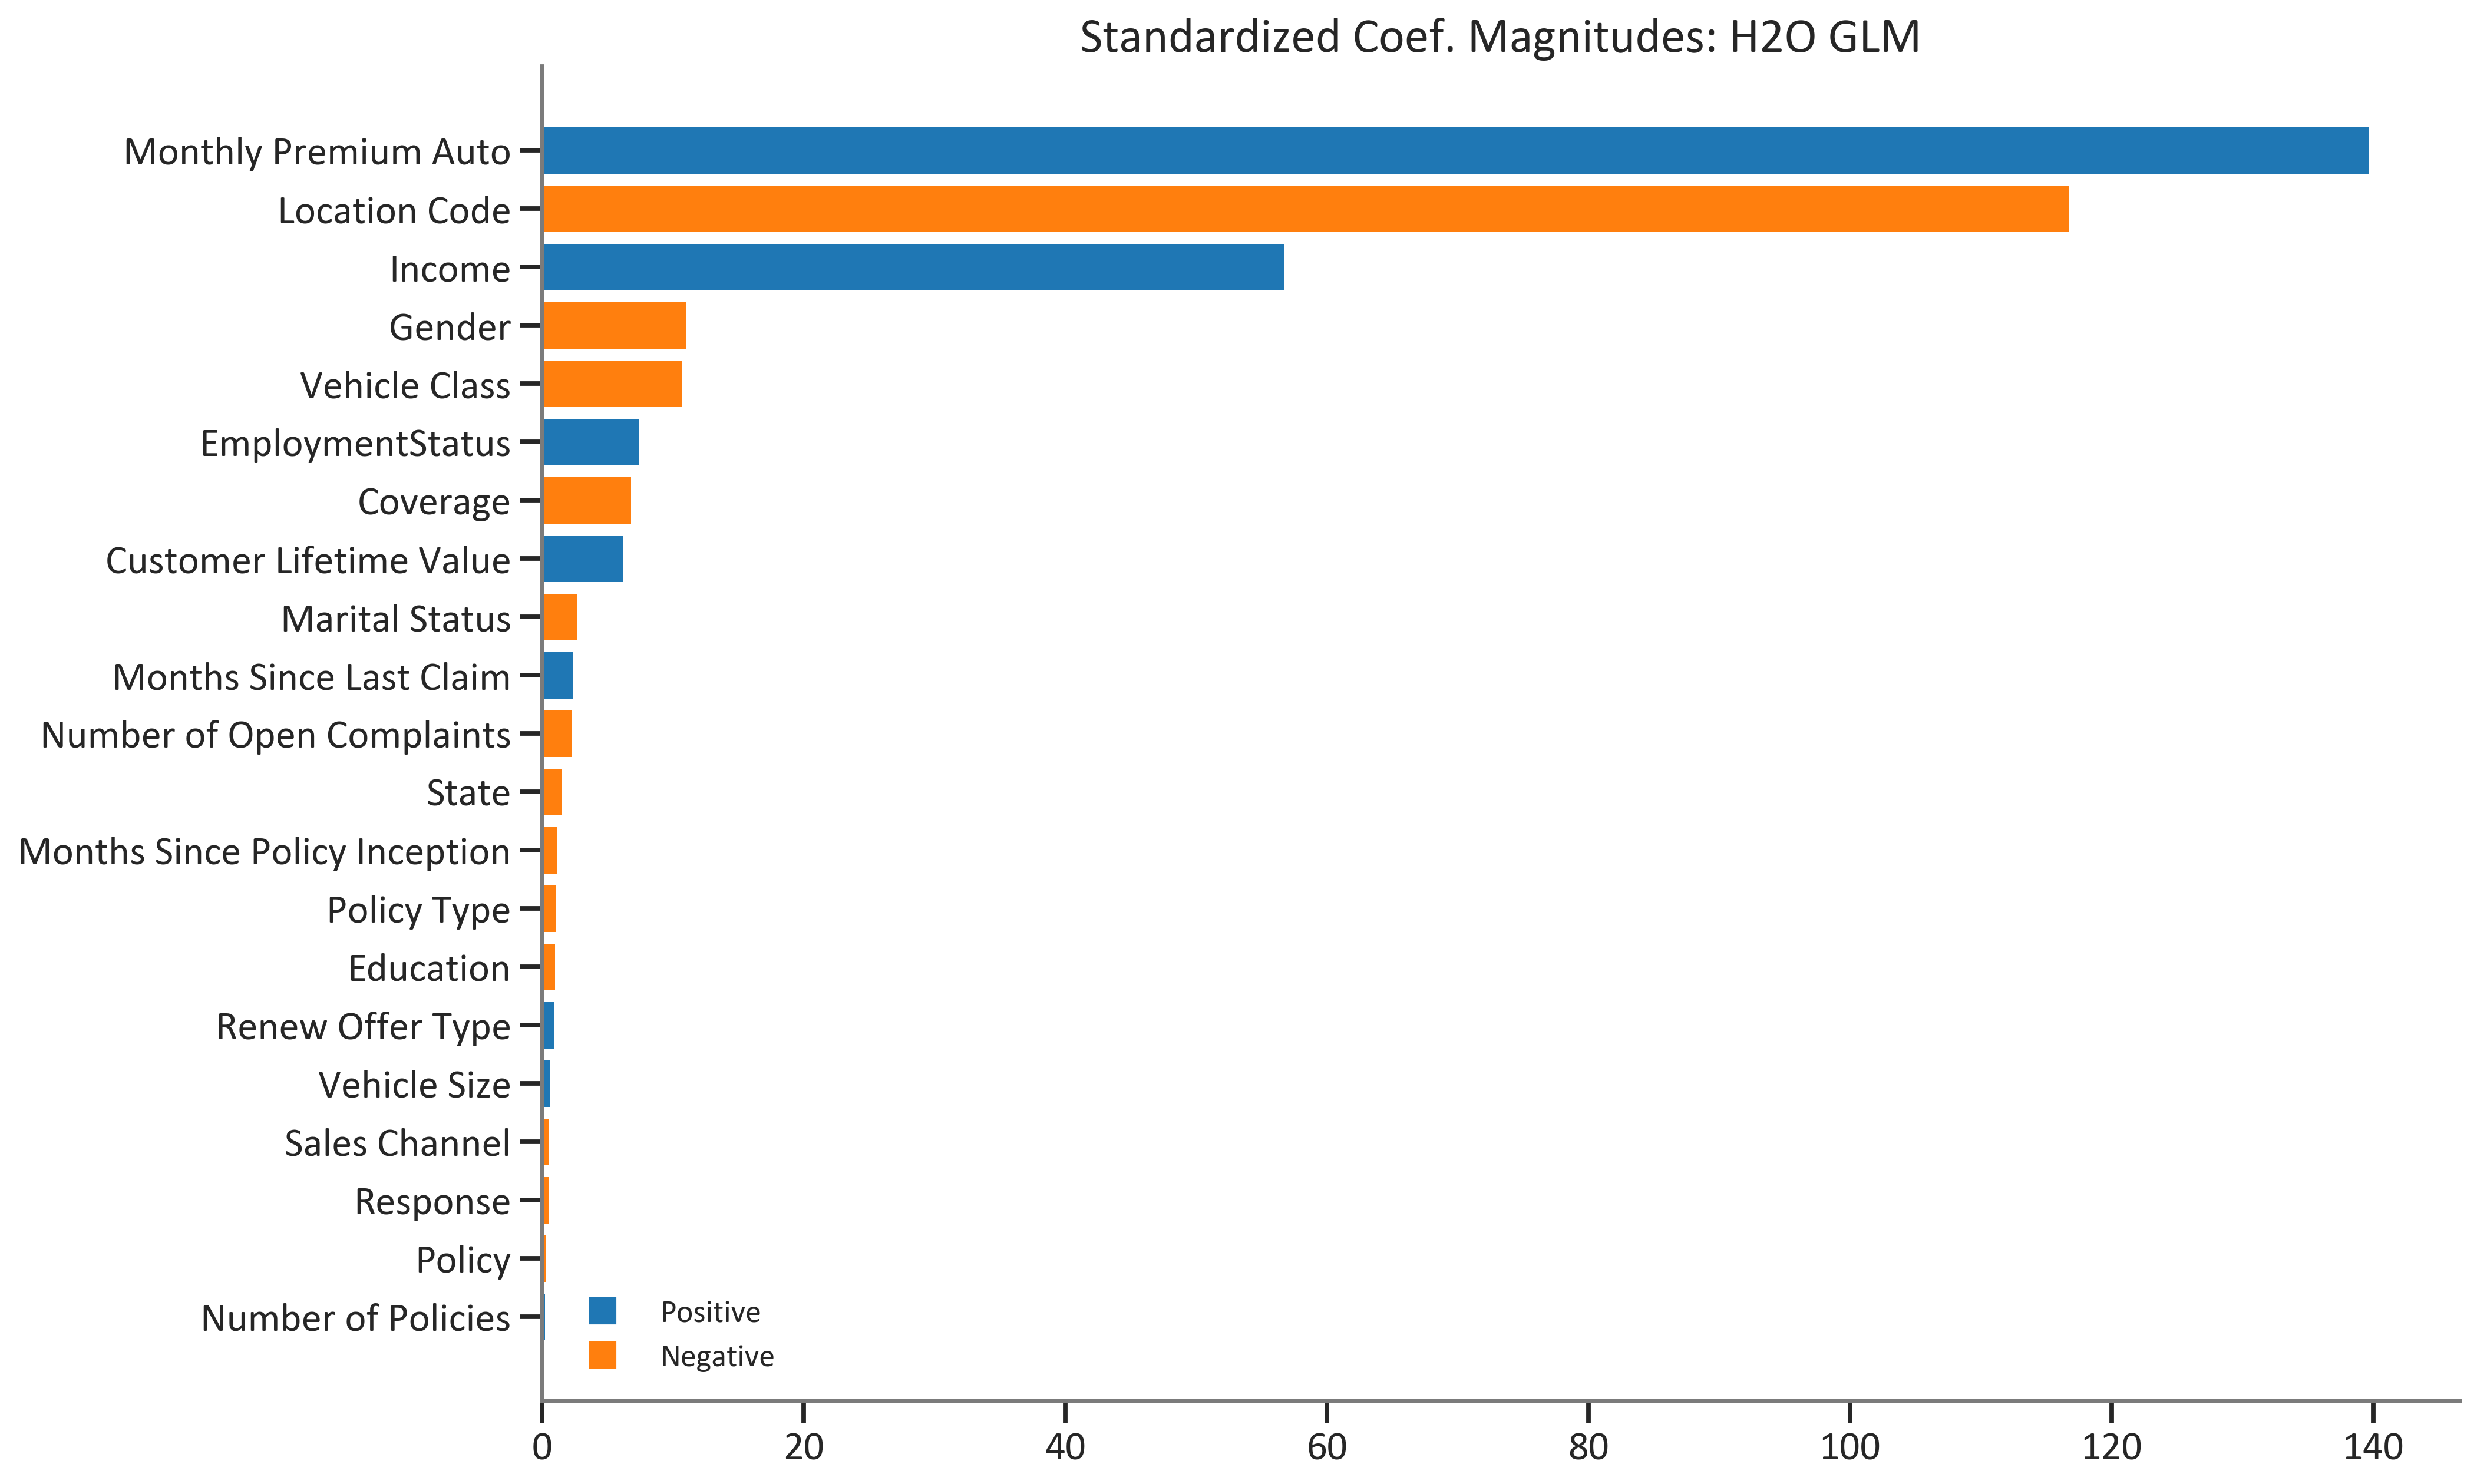

In [38]:
h2o_linear_model_std_coefficients = h2o_linear_model.std_coef_plot()
h2o_linear_model_std_coefficients

### Partial Dependencies

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model GLM_model_python_1629662645641_1 on column 'State'.


,state,mean_response,stddev_response,std_error_mean_response
0,0.0,433.527657,212.179022,2.220097
1,1.0,429.610749,212.179022,2.220097



PartialDependence: Partial Dependence Plot of model GLM_model_python_1629662645641_1 on column 'Total Claim Amount'.


,total_claim_amount,mean_response,stddev_response,std_error_mean_response
0,0.099007,432.797364,212.202211,2.22034
1,152.369569,432.797364,212.202211,2.22034
2,304.640130,432.797364,212.202211,2.22034
3,456.910692,432.797364,212.202211,2.22034
4,609.181254,432.797364,212.202211,2.22034
5,761.451815,432.797364,212.202211,2.22034
6,913.722377,432.797364,212.202211,2.22034
7,1065.992938,432.797364,212.202211,2.22034
8,1218.263500,432.797364,212.202211,2.22034
9,1370.534062,432.797364,212.202211,2.22034


[, ]

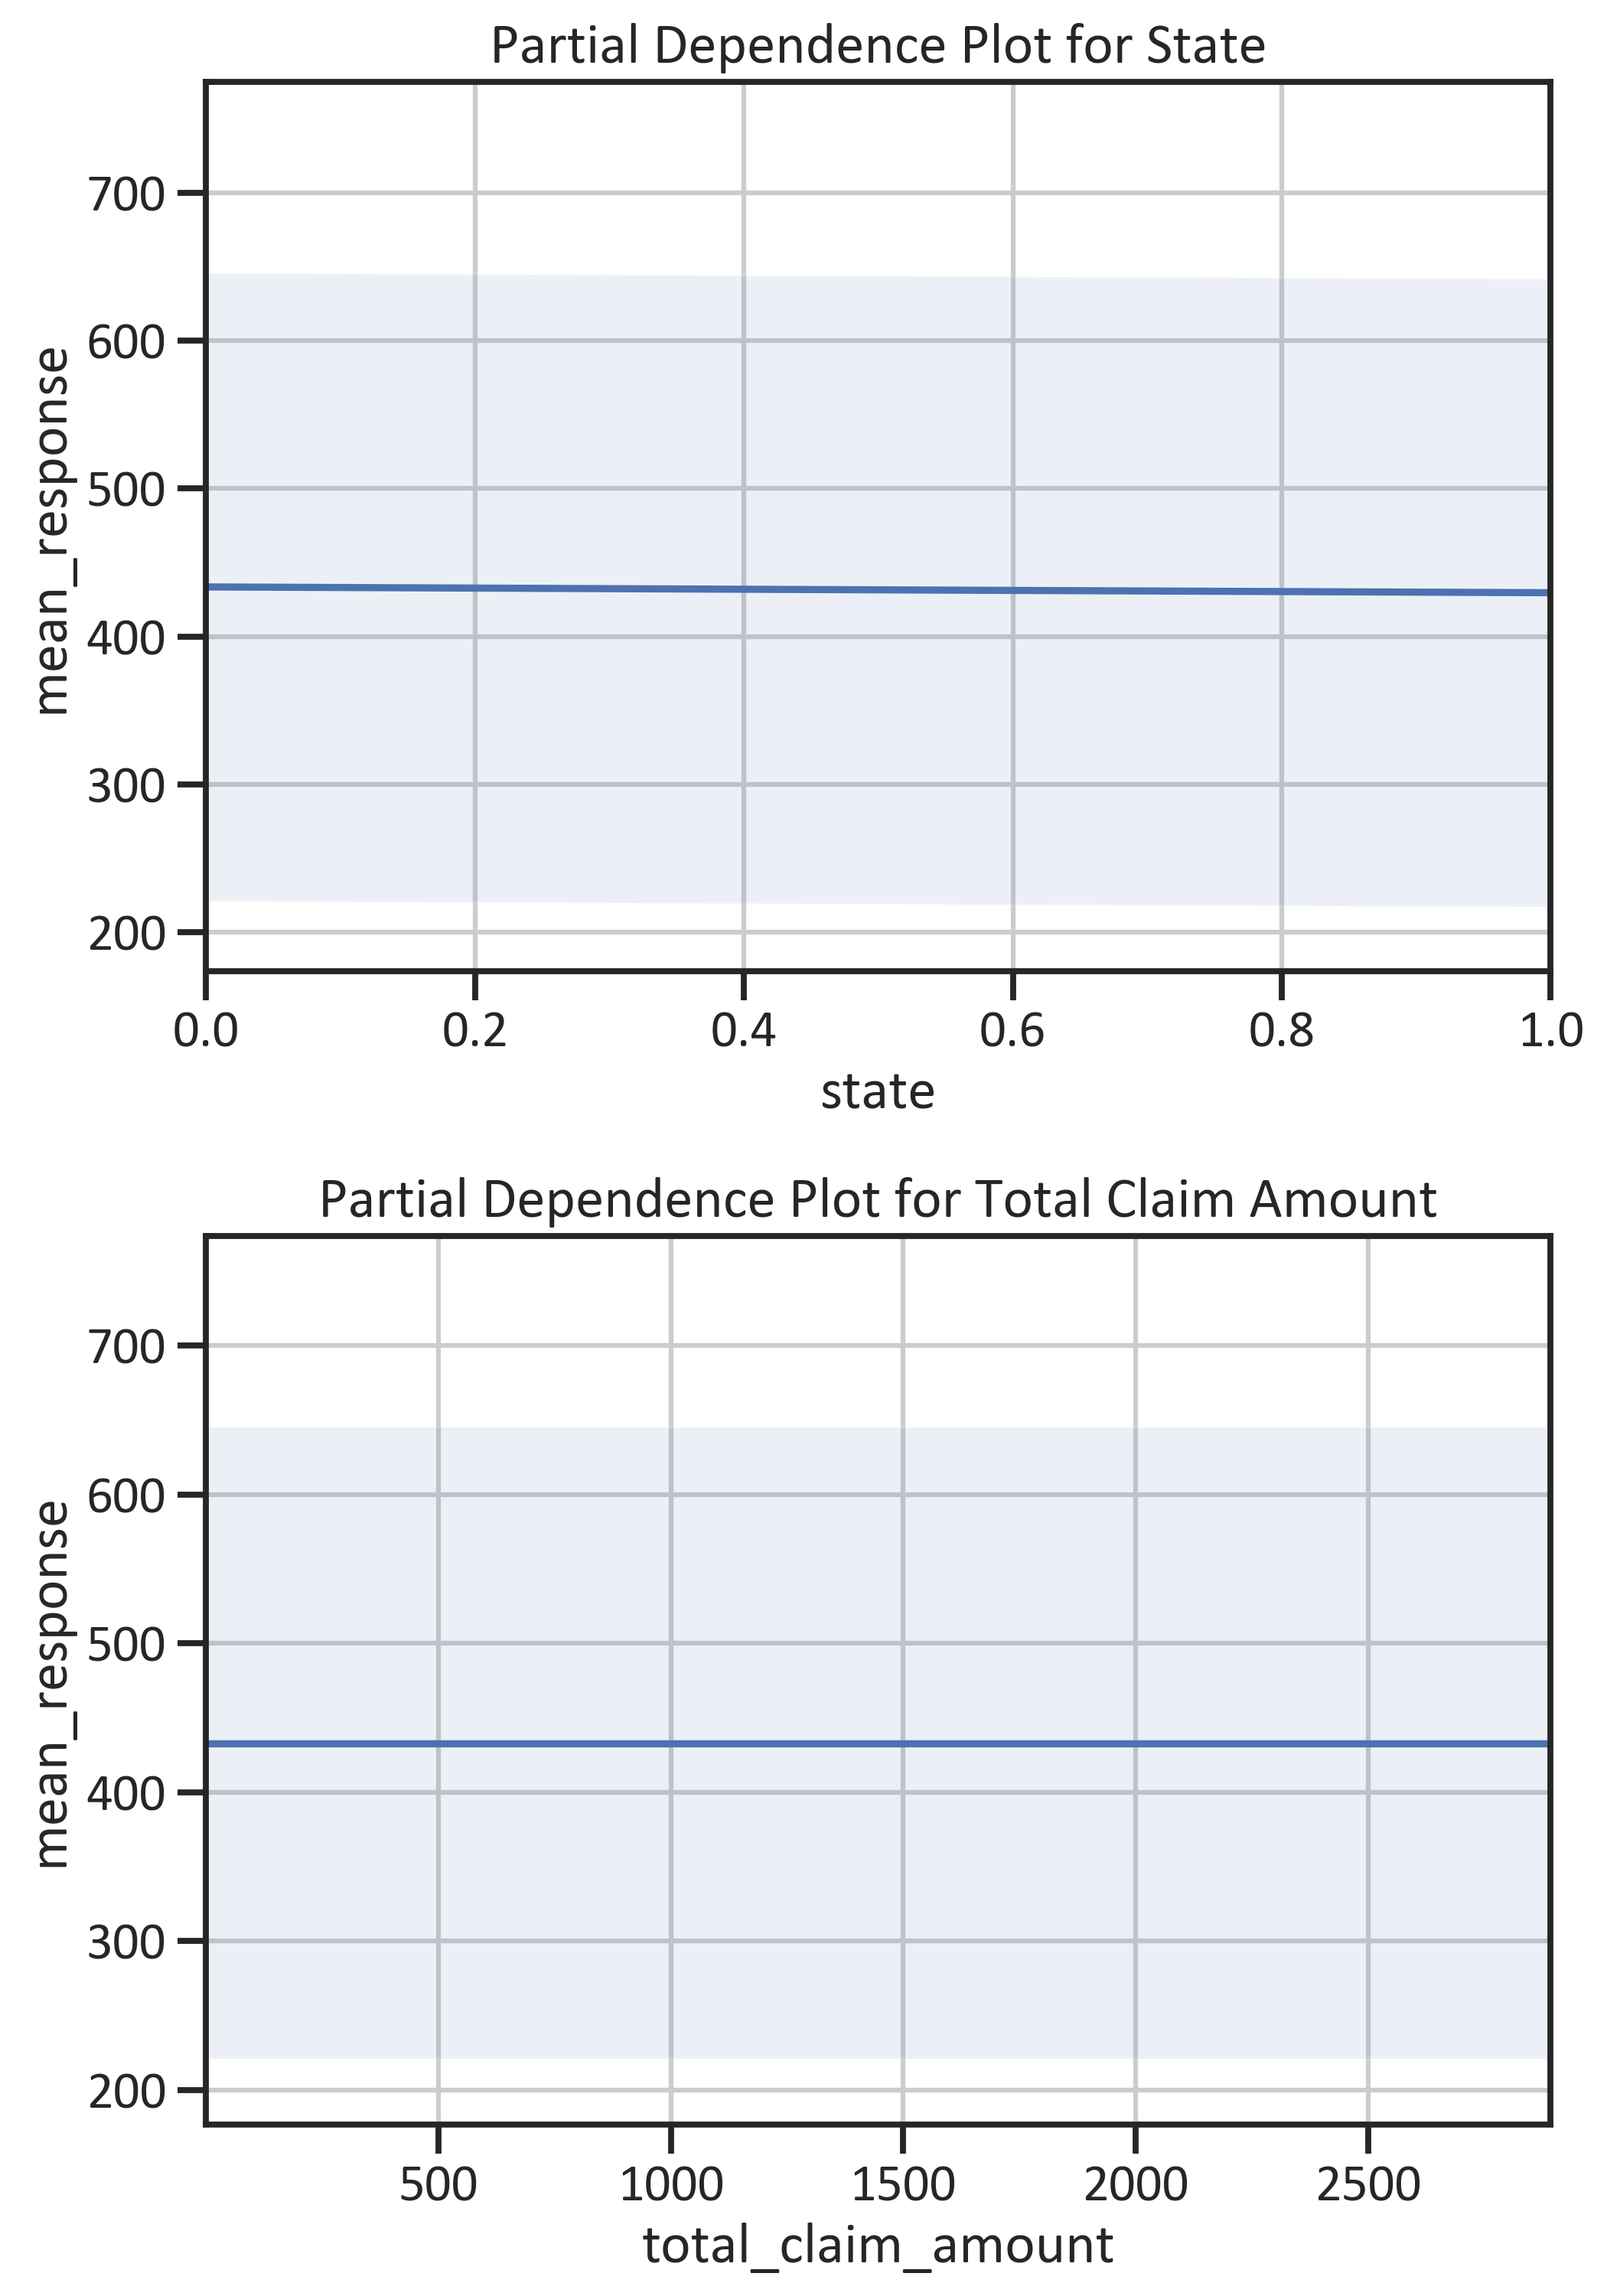

In [44]:
h2o_linear_model_dependency_plot = h2o_linear_model.partial_plot(data = h2o_data, cols = list(initial_data.columns[[0,19]]), server=False, plot = True)
h2o_linear_model_dependency_plot

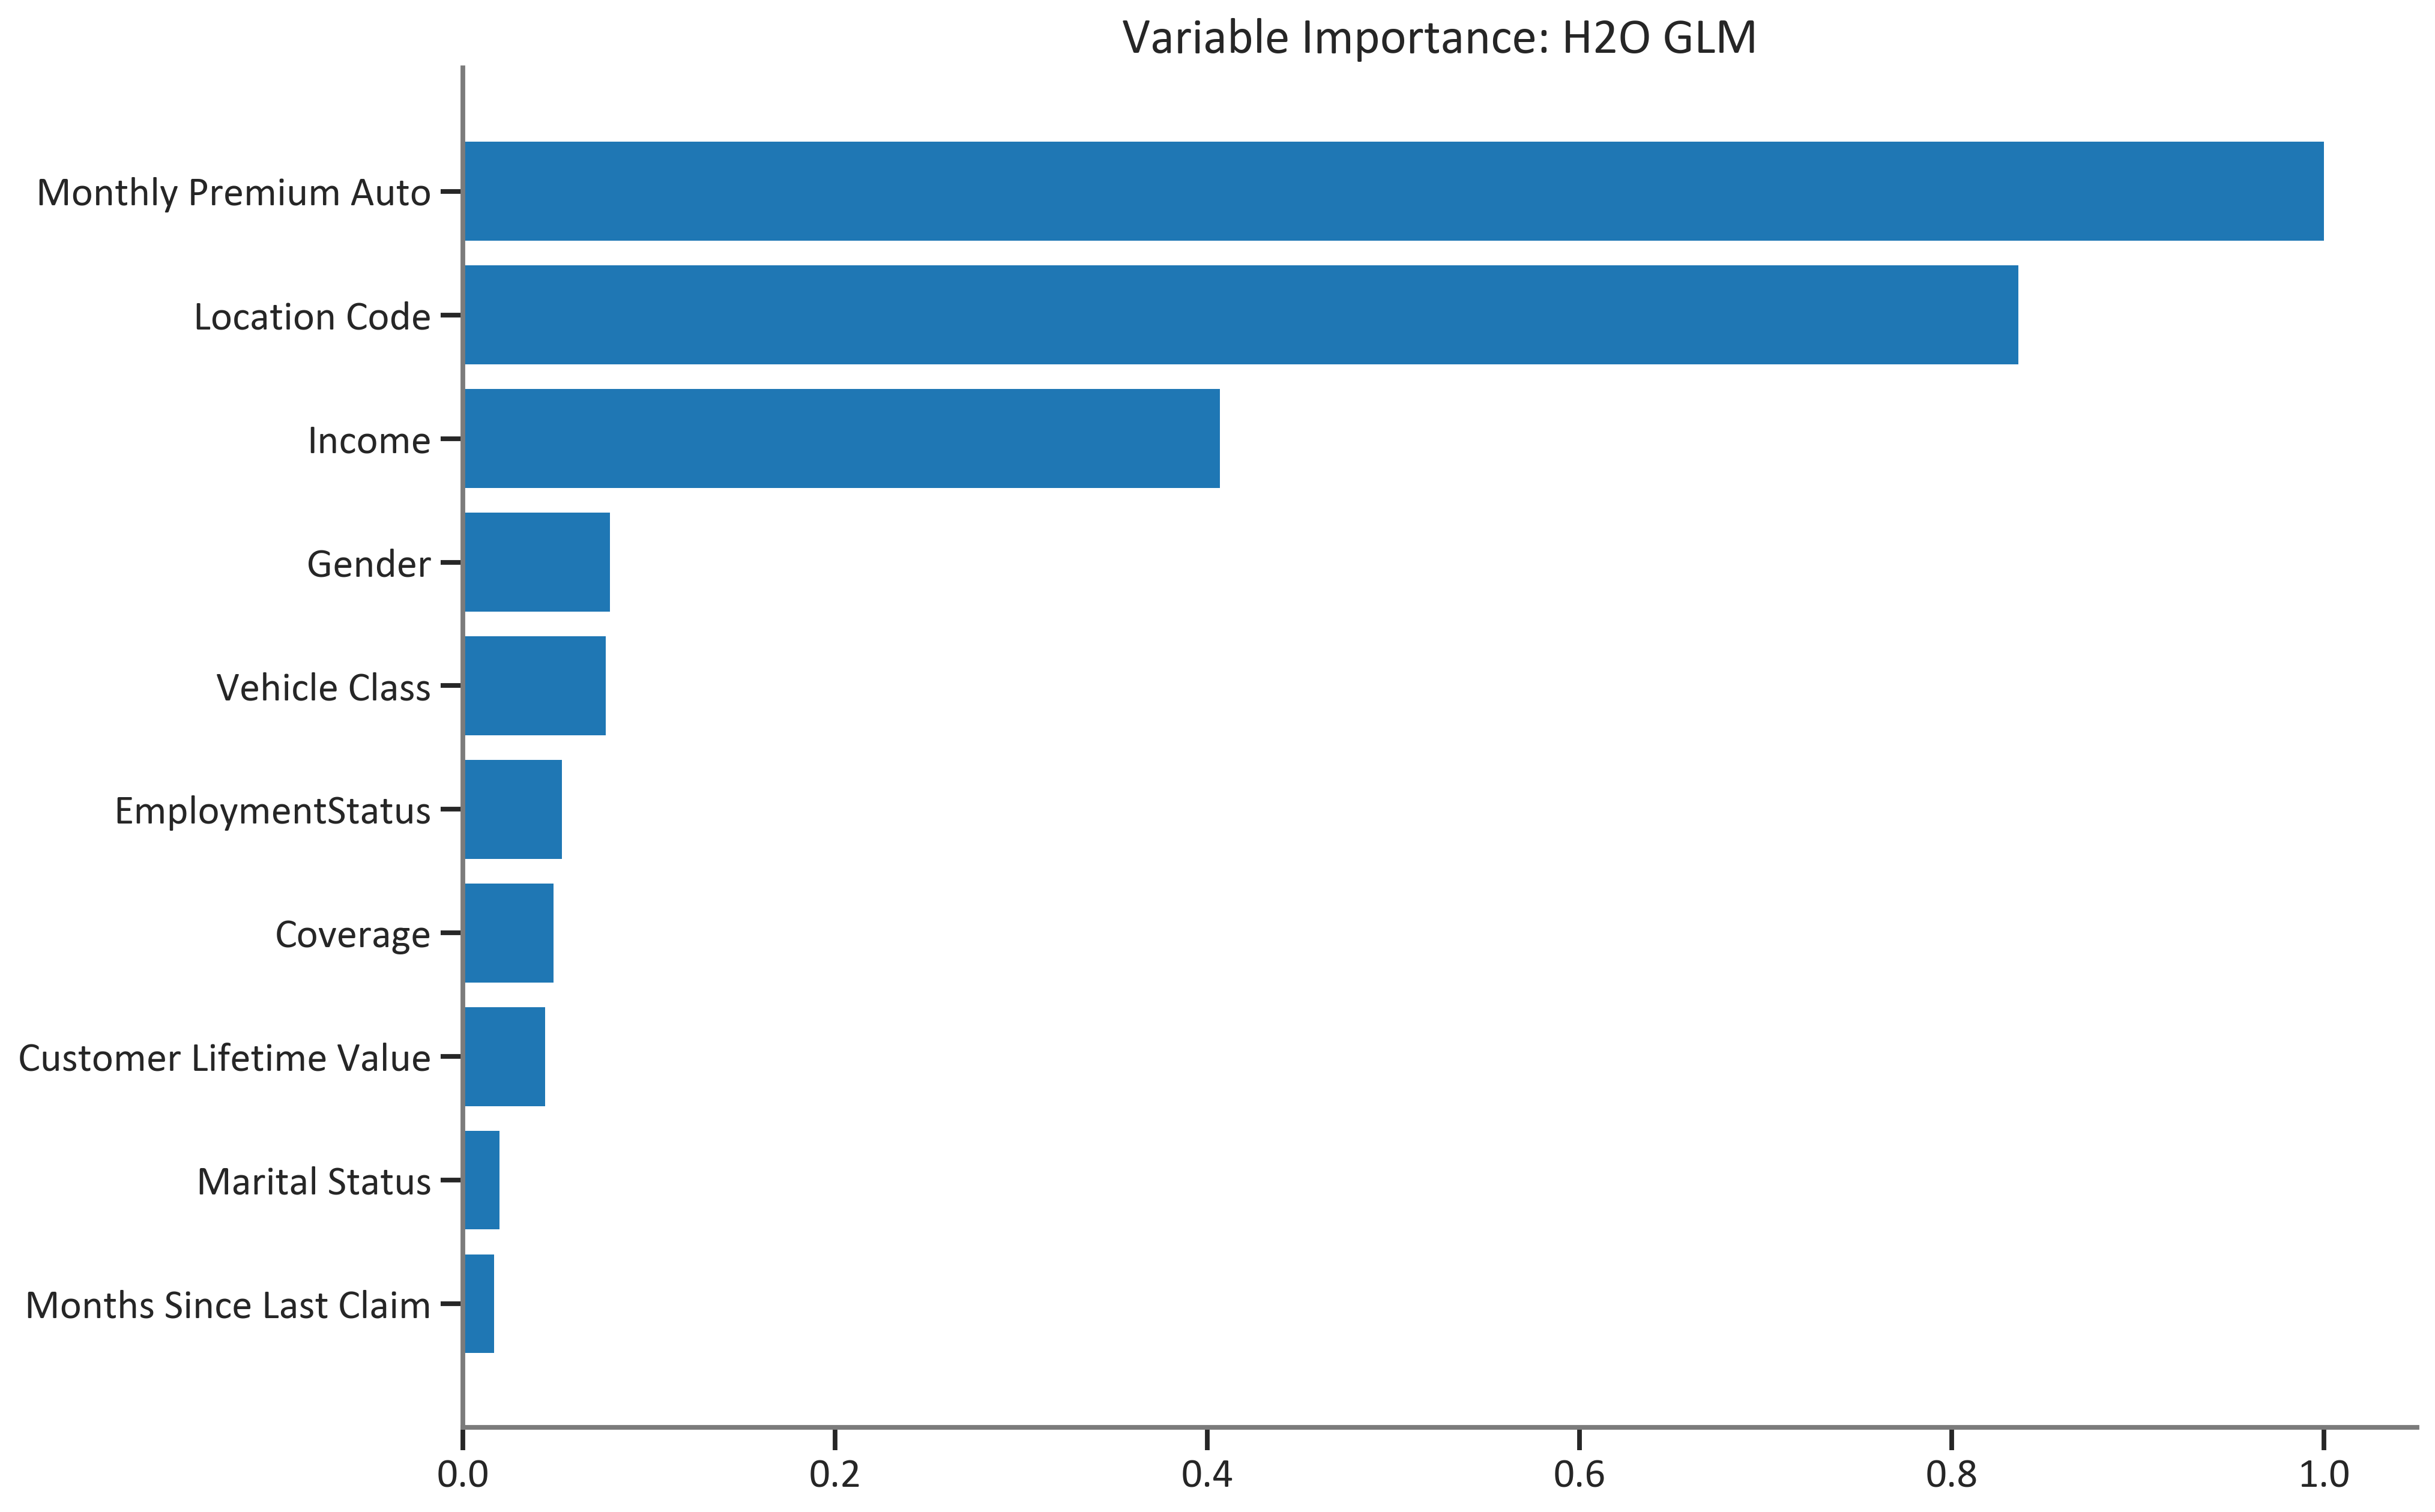

In [45]:
h2o_linear_model_feature_importance = h2o_linear_model.varimp_plot()
h2o_linear_model_feature_importance

## Model Performance

In [46]:
h2o_linear_model_assessment = h2o_linear_model.model_performance()
h2o_linear_model_assessment


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 24844.712331260016
RMSE: 157.6220553452467
MAE: 101.79904883889066
RMSLE: NaN
R^2: 0.7004468136072375
Mean Residual Deviance: 24844.712331260016
Null degrees of freedom: 7325
Residual degrees of freedom: 7304
Null deviance: 607612840.7465751
Residual deviance: 182012362.53881088
AIC: 94978.33944003603


## Remove Collinear Columns

In [47]:
h2o_linear_model_collinear_removed = H2OGeneralizedLinearEstimator(family="gaussian", lambda_ = 0,remove_collinear_columns = True)
h2o_linear_model_collinear_removed.train(x=x,y=y,training_frame=h2o_training_data,validation_frame=h2o_validation_data)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [48]:
h2o_linear_model_collinear_removed_assessment = h2o_linear_model_collinear_removed.model_performance()
print(h2o_linear_model_collinear_removed)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1629662645641_2


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,None,21,21,1,py_2_sid_b8d6




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 23380.71864337616
RMSE: 152.9075493341521
MAE: 102.53007935777588
RMSLE: NaN
R^2: 0.7180982143647627
Mean Residual Deviance: 23380.71864337616
Null degrees of freedom: 7325
Residual degrees of freedom: 7304
Null deviance: 607612840.7465751
Residual deviance: 171287144.78137374
AIC: 94533.40762597627

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 25795.936313899092
RMSE: 160.6111338416459
MAE: 103.18677222520363
RMSLE: NaN
R^2: 0.7310558588001701
Mean Residual Deviance: 25795.936313899092
Null degrees of freedom: 875
Residual degrees of freedom: 854
Null deviance: 84181020.04623385
Residual deviance: 22597240.210975606
AIC: 11430.364002305443

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2021-08-22 22:40:32,0.000 sec,0,6.076128e+08,82939.235408


In [49]:
h2o_linear_model_collinear_removed_scoring_history = h2o_linear_model_collinear_removed.scoring_history()
h2o_linear_model_collinear_removed_scoring_history.head()

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2021-08-22 22:40:32,0.000 sec,0,6.076128e+08,82939.235408
